In [ ]:
! pip install qiskit
! pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We will use the backend to simulate the quantum circuit on a real device.

In [ ]:
from qiskit.providers.fake_provider import FakeCambridge
from qiskit.tools.jupyter import backend_overview

In [ ]:
backend = FakeCambridge()

Obtain usefull information such as:
1) Number of qubits <br/>
2) Number of gates <br/>
3) Physical Map <br/>


In [ ]:
backend

<FakeCambridge('fake_cambridge')>

# Gate Length:
Each quantum gate has a specific length in nanoseconds. Using this, we can calculate the max number of gates we can calculate the before the state completely degradates.
You can see the decoherence time in the column **T1** in the *QubitProperties* section above. <br/>
Gates = DecoherenceTime/AverageGateDuration

In [ ]:
import numpy as np

In [ ]:
# extract the average time of the X gate in nanoseconds 
props = backend.properties()
avg_time = [props.gate_length("u1",i)*1e9 for i in range(backend.configuration().n_qubits)]

In [ ]:
avg_gate_time = np.array(avg_time).mean() # average gate time
avg_decoherence_time = 100*1e3
print(f"X gate can compute {avg_decoherence_time/avg_gate_time} quantum gates")

X gate can compute inf quantum gates


<ipython-input-7-6b25599488e7>:3: RuntimeWarning: divide by zero encountered in double_scalars
  print(f"X gate can compute {avg_decoherence_time/avg_gate_time} quantum gates")


In [ ]:
# build quantum circuit
from qiskit import QuantumRegister, ClassicalRegister,QuantumCircuit

In [ ]:
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)

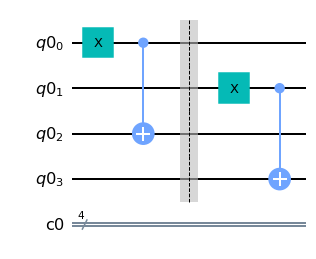

In [ ]:
qc.x(q[0])
qc.cx(q[0],q[2])
qc.barrier()
qc.x(q[1])
qc.cx(q[1],q[3])
qc.draw("mpl")

# Transpile:
This is important because it maps the virtual qubits of the circuit to the physical qubits of the device, and it garantees the circuit will run as efficient as possible.


In [ ]:
from qiskit import transpile

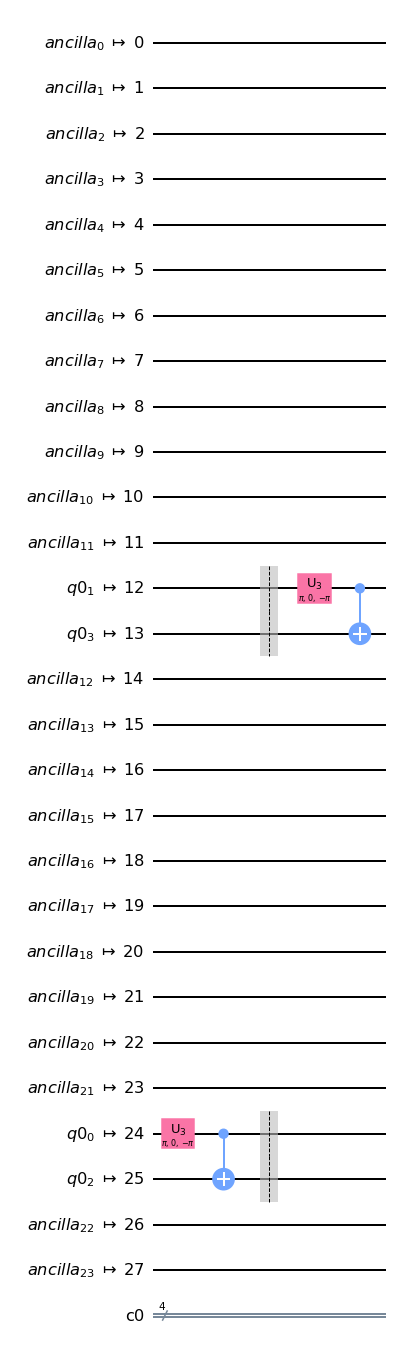

In [ ]:
qc_compiled = transpile(qc,backend)
qc_compiled.draw("mpl")

In [ ]:
from qiskit.visualization import plot_circuit_layout

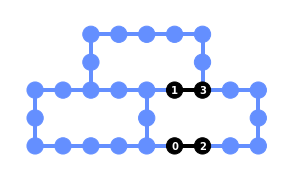

In [ ]:
plot_circuit_layout(qc_compiled,backend)

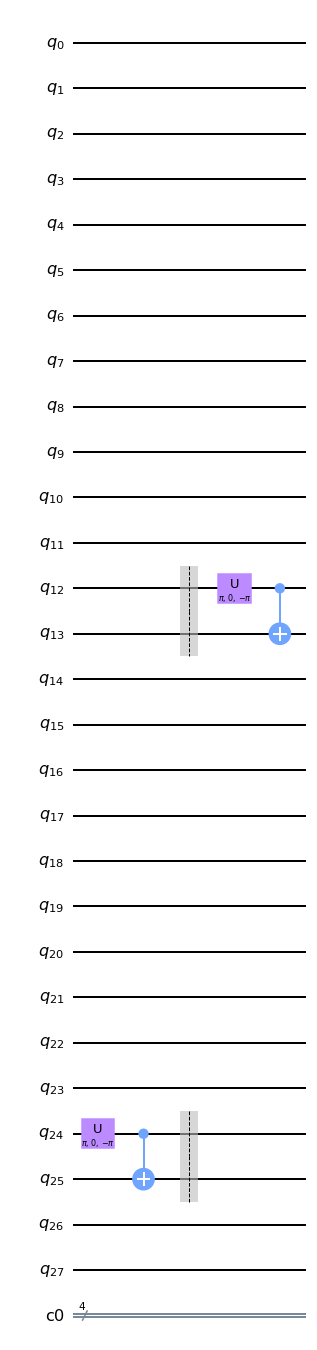

In [ ]:
qc_compiled.decompose().draw("mpl")

# Compile the circuit manually to create a quantum circuit 

In [ ]:
qc_manual_compile = transpile(qc,backend,initial_layout=[3,4,1,0])

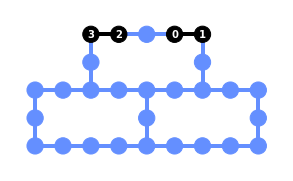

In [ ]:
plot_circuit_layout(qc_manual_compile,backend)

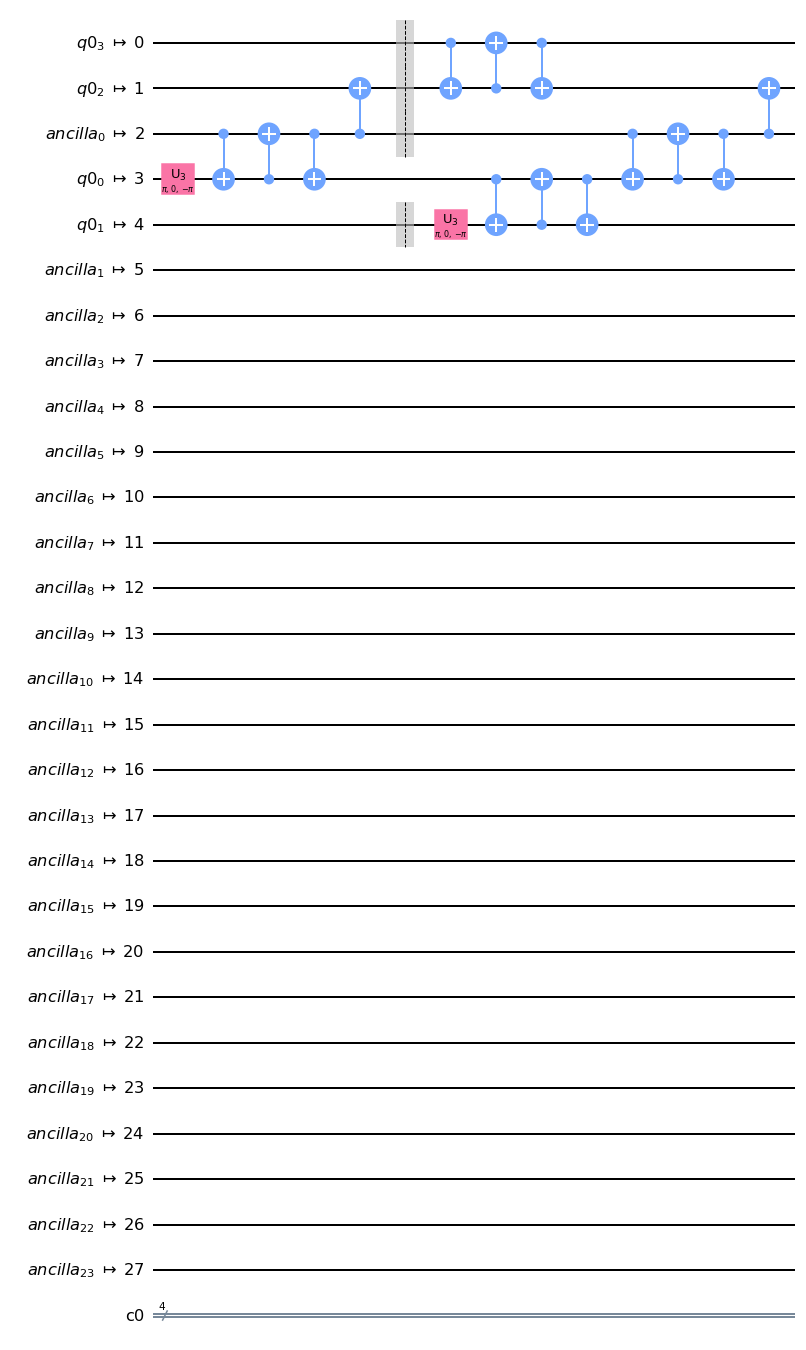

In [ ]:
qc_manual_compile.draw("mpl")

In [ ]:
qc_compiled.depth()

4

In [ ]:
qc_manual_compile.depth()

13

# Optimization Level:
There are different optimization levels in qiskit (0,1,and 2)

In [ ]:
for i in range(4):
  qc_compiled_optimization = transpile(qc,backend,optimization_level=i)
  print("Optimization Level:",i)
  print("Depth:",qc_compiled_optimization.depth())
  print("Gate Counts:",qc_compiled_optimization.count_ops())

Optimization Level: 0
Depth: 10
Gate Counts: OrderedDict([('cx', 11), ('u3', 2), ('barrier', 1)])
Optimization Level: 1
Depth: 4
Gate Counts: OrderedDict([('u3', 2), ('cx', 2), ('barrier', 1)])
Optimization Level: 2
Depth: 4
Gate Counts: OrderedDict([('u3', 2), ('cx', 2), ('barrier', 1)])
Optimization Level: 3
Depth: 4
Gate Counts: OrderedDict([('u3', 2), ('cx', 2), ('barrier', 1)])


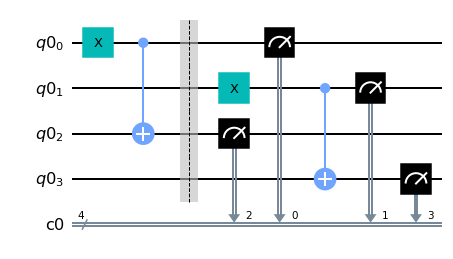

In [ ]:
# perform measurements in all the quantum bits:
for i in range(4):
  qc.measure(q[i],c[i])
qc.draw("mpl")

In [ ]:
qc0 = transpile(qc,backend,optimization_level = 0)
qc1 = transpile(qc,backend,optimization_level = 1)
qc2 = transpile(qc,backend,optimization_level = 2)
qc3 = transpile(qc,backend,optimization_level = 3)

In [ ]:
qc_list = [qc0,qc1,qc2,qc3]
job = backend.run(qc_list,shots = 1024)
results = job.result()
counts = results.get_counts()
print(counts)

[{'0001': 2, '1101': 33, '0110': 2, '1110': 63, '1001': 10, '0101': 8, '1100': 4, '0011': 6, '0111': 57, '1111': 672, '1010': 14, '1011': 153}, {'0110': 1, '0001': 1, '1001': 3, '0101': 3, '0010': 4, '1010': 6, '1111': 814, '1110': 31, '1101': 38, '0011': 5, '0111': 88, '1011': 30}, {'1001': 1, '0010': 1, '1101': 43, '0011': 3, '0111': 88, '1010': 2, '1111': 795, '0110': 7, '1110': 37, '1100': 3, '0101': 4, '1011': 40}, {'1000': 1, '0110': 3, '1001': 2, '1100': 1, '0101': 7, '0001': 1, '1110': 44, '1011': 40, '0000': 1, '0011': 2, '0111': 71, '1111': 812, '1010': 4, '1101': 35}]


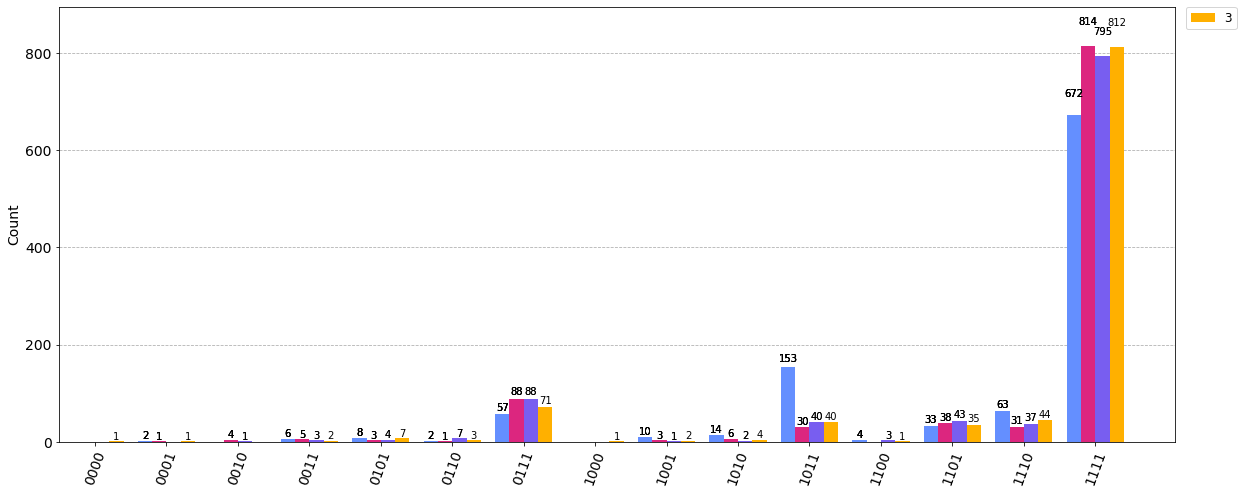

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,8),legend = ['0','1','2','3'])